In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading And Overview

In [2]:
# Load the dataset
rawfile = pd.read_csv("dragomanova.csv")
data = rawfile.copy()

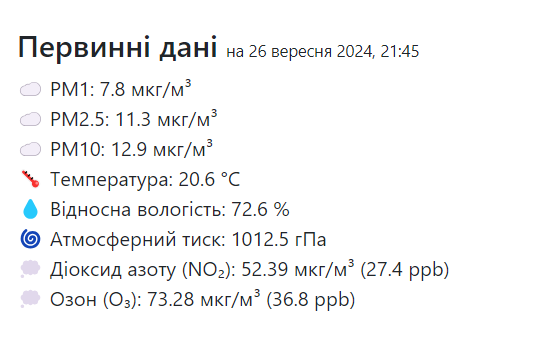

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158484 entries, 0 to 1158483
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   device_id   1158484 non-null  int64  
 1   phenomenon  1158484 non-null  object 
 2   value       1158484 non-null  float64
 3   logged_at   1158484 non-null  object 
 4   value_text  0 non-null        float64
dtypes: float64(2), int64(1), object(2)
memory usage: 44.2+ MB


In [4]:
data.head()

,device_id,phenomenon,value,logged_at,value_text
0,17113,pm1,16.26,2021-03-28 00:00:21,NaN
1,17113,pm25,27.12,2021-03-28 00:00:21,NaN
2,17113,pm10,42.13,2021-03-28 00:00:21,NaN
3,17113,pressure_pa,1024480.00,2021-03-28 00:00:21,NaN
4,17113,humidity,65.26,2021-03-28 00:00:21,NaN


## Cleaning

In [5]:
# make column logged_at datatime type
data['logged_at'] = pd.to_datetime(data['logged_at'])

In [6]:
# check if exist not null values in value_text
non_null_rows = data[data['value_text'].notna()]
print(non_null_rows)

Empty DataFrame
Columns: [device_id, phenomenon, value, logged_at, value_text]
Index: []


In [7]:
data = data.drop(columns=['value_text', 'device_id'])

In [8]:
data = data.drop_duplicates()

In [9]:
data['year'] = data['logged_at'].dt.year
data['month'] = data['logged_at'].dt.month
data['day'] = data['logged_at'].dt.day
data['hour'] = data['logged_at'].dt.hour


In [10]:
# Перетворюємо колонку 'phenomenon' в окремі стовпці
data = data.pivot_table(index=['logged_at', 'year', 'month', 'day', 'hour'],
                                      columns='phenomenon',
                                      values='value',
                                      aggfunc='first').reset_index()

In [11]:
data[data.isna().any(axis=1)]


phenomenon,logged_at,year,month,day,hour,humidity,no2_ppb,no2_ug,o3_ppb,o3_ug,pm1,pm10,pm25,pressure_pa,temperature
51473,2022-10-10 12:45:20,2022,10,10,12,83.69,3.9988,7.93,23.9697,49.59,NaN,NaN,NaN,1024700.0,13.03
51474,2022-10-10 13:00:11,2022,10,10,13,82.00,3.9991,7.93,23.5511,48.72,NaN,NaN,NaN,1024650.0,13.04
51475,2022-10-10 13:15:18,2022,10,10,13,80.31,3.4600,6.86,23.5492,48.71,NaN,NaN,NaN,1024560.0,13.05
51476,2022-10-10 13:30:07,2022,10,10,13,79.44,2.4912,4.94,23.6376,48.90,NaN,NaN,NaN,1024460.0,12.98
51477,2022-10-10 13:45:11,2022,10,10,13,78.50,1.4977,2.97,23.8150,49.27,NaN,NaN,NaN,1024380.0,12.94
51478,2022-10-10 14:00:11,2022,10,10,14,77.56,0.6707,1.33,23.9376,49.52,NaN,NaN,NaN,1024340.0,12.95
51479,2022-10-10 14:15:11,2022,10,10,14,76.63,0.1261,0.25,24.0678,49.78,NaN,NaN,NaN,1024360.0,13.01
51480,2022-10-10 14:30:18,2022,10,10,14,76.00,0.0000,0.00,24.2440,50.14,NaN,NaN,NaN,1024380.0,13.04
51481,2022-10-10 14:45:08,2022,10,10,14,73.94,0.0000,0.00,24.3955,50.42,NaN,NaN,NaN,1024380.0,13.23
64876,2023-03-22 17:30:11,2023,3,22,17,NaN,19.4299,37.84,22.7341,46.19,5.10,8.51,7.74,NaN,NaN


In [12]:
data_cleaned = data.dropna()


## Dependencies And Regression Analysis

### Correlation between phenomenon values

In [13]:
phenomenon_values = data_cleaned.iloc[:, 6:]
phenomenon_values

phenomenon,no2_ppb,no2_ug,o3_ppb,o3_ug,pm1,pm10,pm25,pressure_pa,temperature
0,59.1382,119.35,0.3182,0.67,16.26,42.13,27.12,1024480.0,8.00
1,59.0939,119.28,0.1900,0.40,16.17,41.92,26.98,1024500.0,7.96
2,60.3561,121.92,0.0000,0.00,16.07,41.84,26.93,1024620.0,7.78
3,60.3561,121.92,0.0000,0.00,16.07,41.84,26.93,1024620.0,7.78
4,64.1190,129.63,0.0000,0.00,16.72,43.38,27.93,1024750.0,7.58
...,...,...,...,...,...,...,...,...,...
115840,28.5641,54.35,38.3231,76.08,5.88,9.44,8.41,1012770.0,21.61
115841,28.2818,53.85,38.5886,76.66,5.78,9.32,8.25,1012680.0,21.38
115842,28.0563,53.46,38.2684,76.08,5.68,9.20,8.19,1012600.0,21.14
115843,27.8102,53.03,38.1398,75.88,5.59,9.13,8.09,1012550.0,20.91


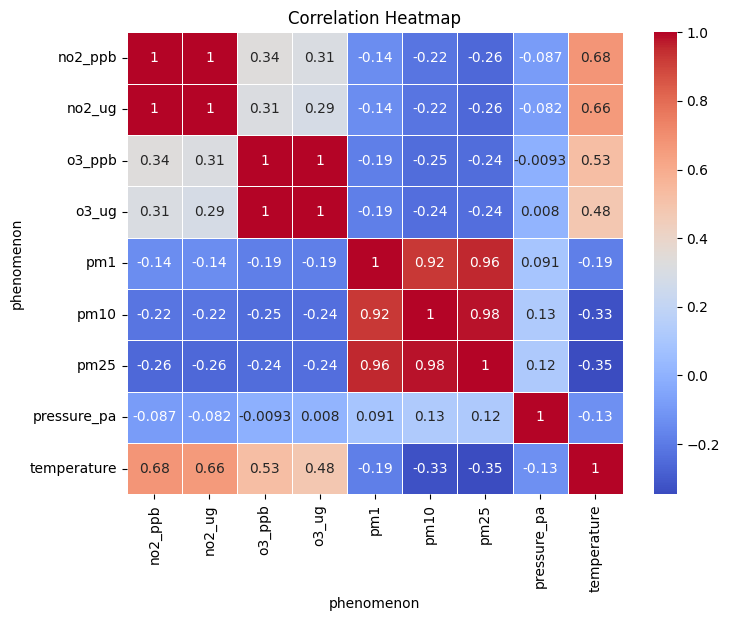

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(phenomenon_values.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

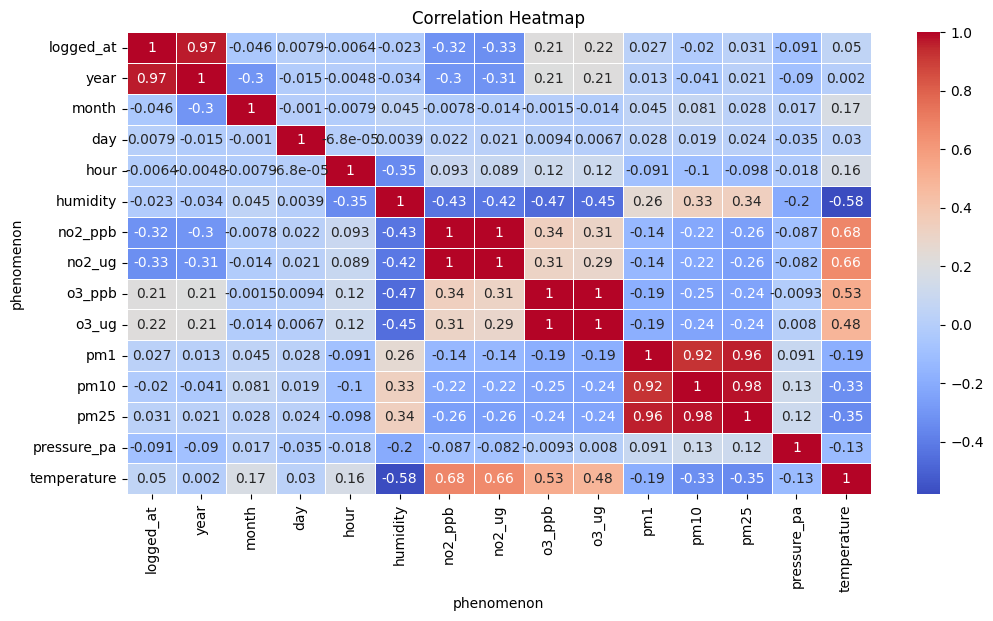

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Бачимо що no2_ppb і no2_ug та o3_ppb і o3_ug це одна ознака в різних метриках. 

Також бачимо значну кореляцію між pm забрудниками та незначну між no2 і температурою.

In [16]:
phenomenon_values = phenomenon_values.drop(columns=['no2_ppb', "o3_ppb"])
data_cleaned = data_cleaned.drop(columns=['no2_ppb', "o3_ppb"])

In [17]:
phenomenon_values

phenomenon,no2_ug,o3_ug,pm1,pm10,pm25,pressure_pa,temperature
0,119.35,0.67,16.26,42.13,27.12,1024480.0,8.00
1,119.28,0.40,16.17,41.92,26.98,1024500.0,7.96
2,121.92,0.00,16.07,41.84,26.93,1024620.0,7.78
3,121.92,0.00,16.07,41.84,26.93,1024620.0,7.78
4,129.63,0.00,16.72,43.38,27.93,1024750.0,7.58
...,...,...,...,...,...,...,...
115840,54.35,76.08,5.88,9.44,8.41,1012770.0,21.61
115841,53.85,76.66,5.78,9.32,8.25,1012680.0,21.38
115842,53.46,76.08,5.68,9.20,8.19,1012600.0,21.14
115843,53.03,75.88,5.59,9.13,8.09,1012550.0,20.91


In [18]:
from itertools import combinations

In [19]:
pairs = combinations(phenomenon_values, 2)

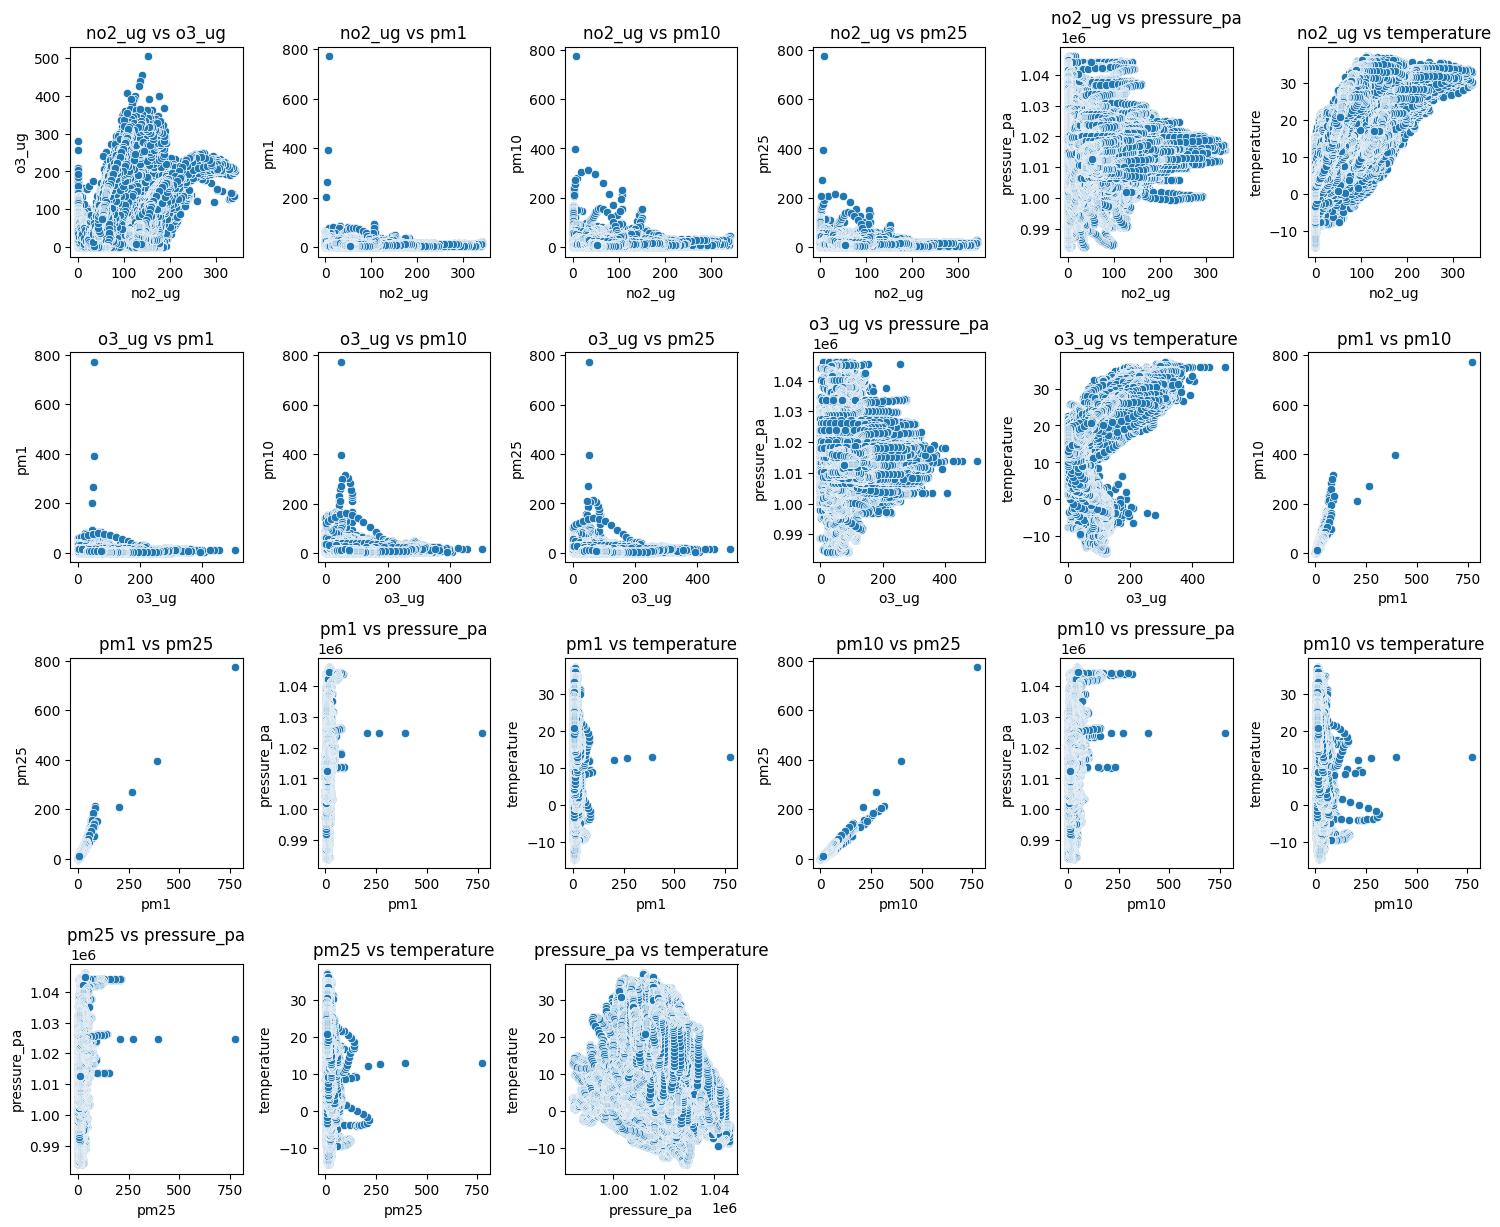

In [20]:
plt.figure(figsize=(15, 15))  

for i, (col1, col2) in enumerate(pairs, start=1):
    plt.subplot(5, 6, i)  
    sns.scatterplot(data=data_cleaned, x=col1, y=col2)
    plt.title(f'{col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)

plt.tight_layout() 
plt.show()


### Relationship between phenomenon values and time

In [21]:
data_cleaned

phenomenon,logged_at,year,month,day,hour,humidity,no2_ug,o3_ug,pm1,pm10,pm25,pressure_pa,temperature
0,2021-03-28 00:00:21,2021,3,28,0,65.26,119.35,0.67,16.26,42.13,27.12,1024480.0,8.00
1,2021-03-28 00:04:29,2021,3,28,0,65.56,119.28,0.40,16.17,41.92,26.98,1024500.0,7.96
2,2021-03-28 00:22:04,2021,3,28,0,66.82,121.92,0.00,16.07,41.84,26.93,1024620.0,7.78
3,2021-03-28 00:23:03,2021,3,28,0,66.82,121.92,0.00,16.07,41.84,26.93,1024620.0,7.78
4,2021-03-28 00:43:48,2021,3,28,0,68.19,129.63,0.00,16.72,43.38,27.93,1024750.0,7.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115840,2024-09-26 20:30:12,2024,9,26,20,68.69,54.35,76.08,5.88,9.44,8.41,1012770.0,21.61
115841,2024-09-26 20:45:11,2024,9,26,20,69.63,53.85,76.66,5.78,9.32,8.25,1012680.0,21.38
115842,2024-09-26 21:00:12,2024,9,26,21,70.56,53.46,76.08,5.68,9.20,8.19,1012600.0,21.14
115843,2024-09-26 21:15:09,2024,9,26,21,71.50,53.03,75.88,5.59,9.13,8.09,1012550.0,20.91


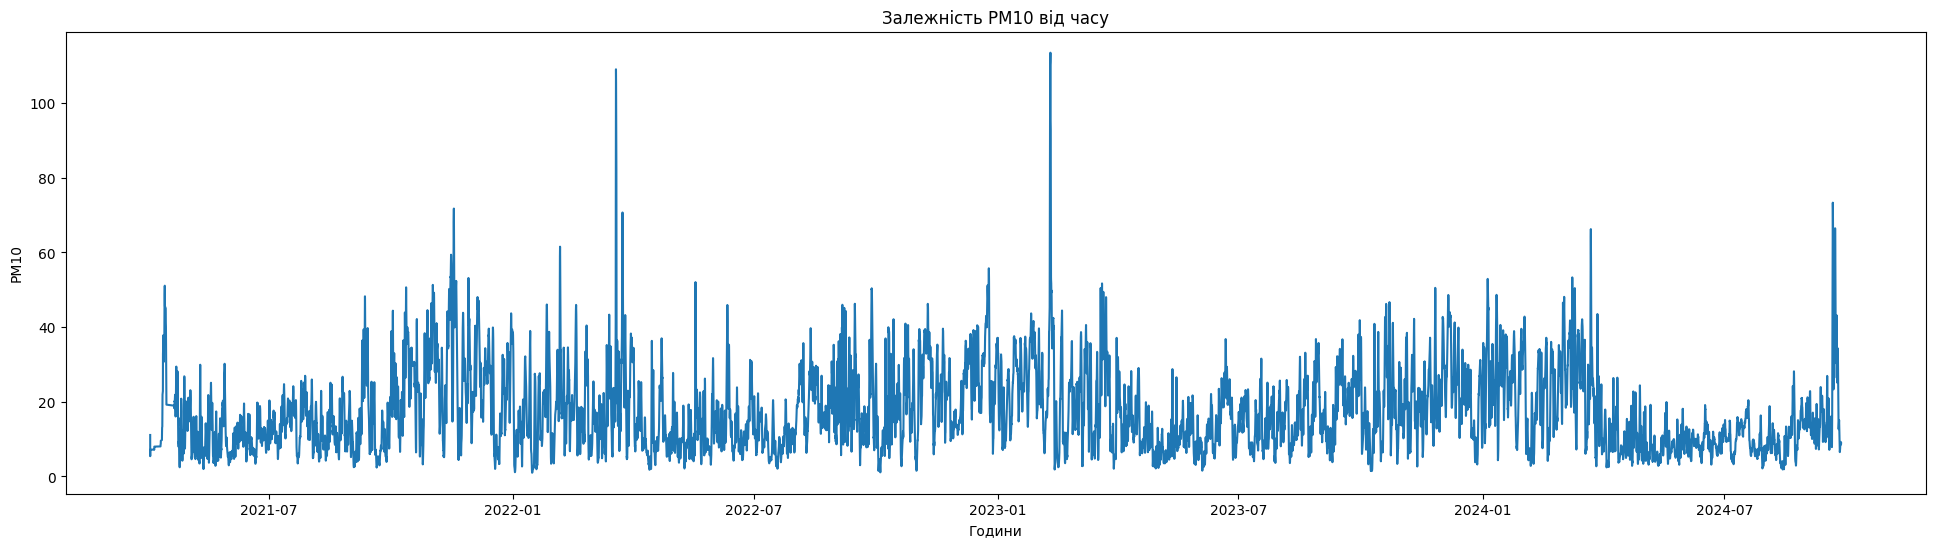

In [35]:
t = 'pm10'
# Візуалізація залежності від часу
plt.figure(figsize=(24, 6))
sns.lineplot(x='logged_at', y=data_cleaned[t].rolling(window=50).mean()
, data=data_cleaned)
plt.title('Залежність PM10 від часу')
plt.xlabel('Години')
plt.ylabel('PM10')
plt.show()


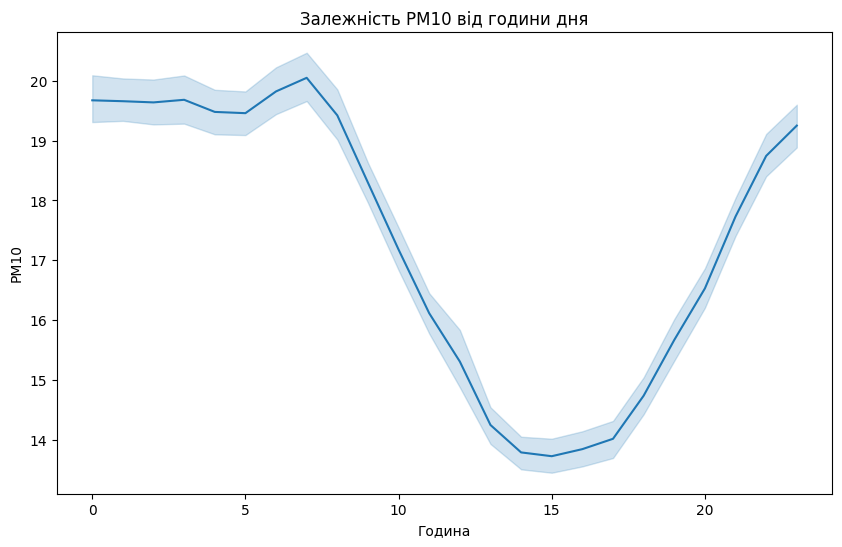

In [36]:

# Візуалізація залежності від години
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y=t, data=data_cleaned)
plt.title('Залежність PM10 від години дня')
plt.xlabel('Година')
plt.ylabel('PM10')
plt.show()


Бачимо, що вночі та зранку pm10 приймає найбільші значення і в обіді спадає до мінімальних

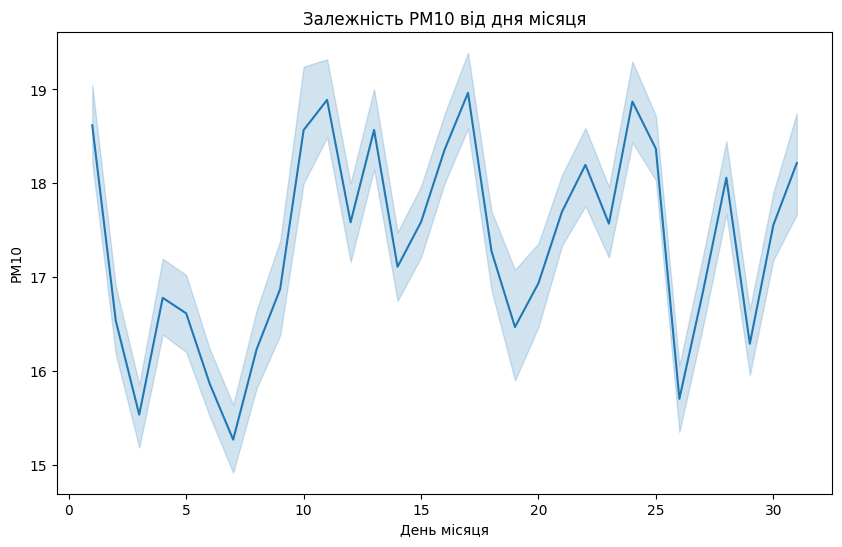

In [37]:

# Візуалізація залежності від дня місяця
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y=t, data=data_cleaned)
plt.title('Залежність PM10 від дня місяця')
plt.xlabel('День місяця')
plt.ylabel('PM10')
plt.show()


Не бачимо ніякої залежності

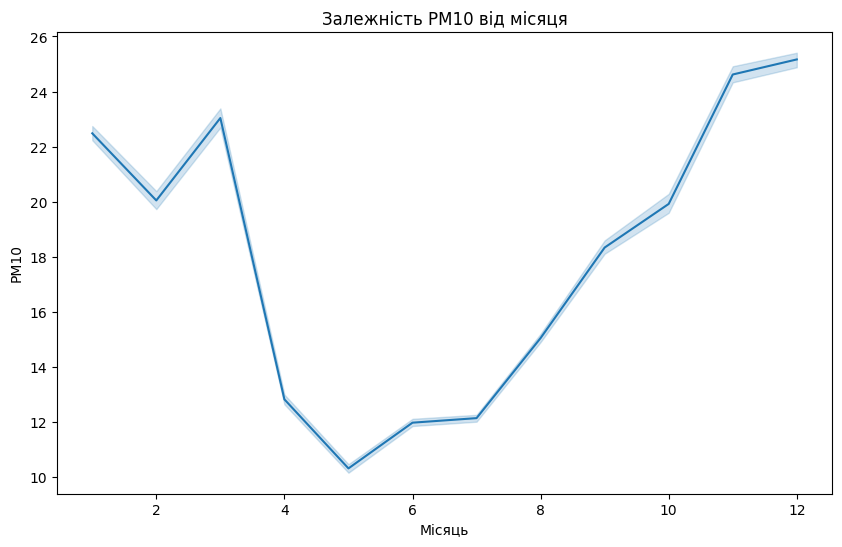

In [38]:

# Візуалізація залежності від місяця
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y=t, data=data_cleaned)
plt.title('Залежність PM10 від місяця')
plt.xlabel('Місяць')
plt.ylabel('PM10')
plt.show()

Бачимо параболу, з якої видно що влітку мінімальні значення, а взимку найбільші.

## Regression

### Dependence of one pollutant on another

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

Залежність PM25 від PM10:
RMSE: 1.7643717643888597
R²: 0.963696395983054


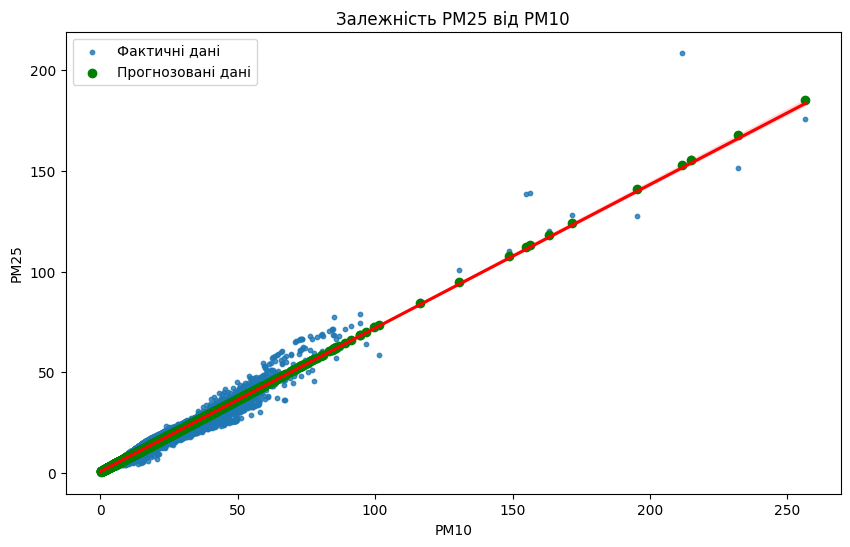

In [24]:
X_pm10 = phenomenon_values[['pm10']]
y_pm25 = phenomenon_values['pm25']

# Розподіл даних на тренувальний та тестовий набори
X_train_pm10, X_test_pm10, y_train_pm25, y_test_pm25 = train_test_split(X_pm10, y_pm25, test_size=0.2, random_state=41)

# Побудова моделі
model_pm = LinearRegression()
model_pm.fit(X_train_pm10, y_train_pm25)

# Прогнозування
y_pred_pm25 = model_pm.predict(X_test_pm10)

# Оцінка моделі
rmse = root_mean_squared_error(y_test_pm25, y_pred_pm25)
r2 = r2_score(y_test_pm25, y_pred_pm25)

print("Залежність PM25 від PM10:")
print("RMSE:", rmse)
print("R²:", r2)

# Візуалізація
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test_pm10, y=y_test_pm25, line_kws={'color': 'red'}, scatter_kws={'s': 10}, label='Фактичні дані')
plt.scatter(X_test_pm10, y_pred_pm25, color='green', label='Прогнозовані дані')
plt.title('Залежність PM2.5 від PM10')
plt.xlabel('PM10')
plt.ylabel('PM25')
plt.legend()
plt.show()

### Dependence of the pollutant on the time


In [25]:
from sklearn.ensemble import RandomForestRegressor


R^2 для Random Forest: 0.9989283381217208


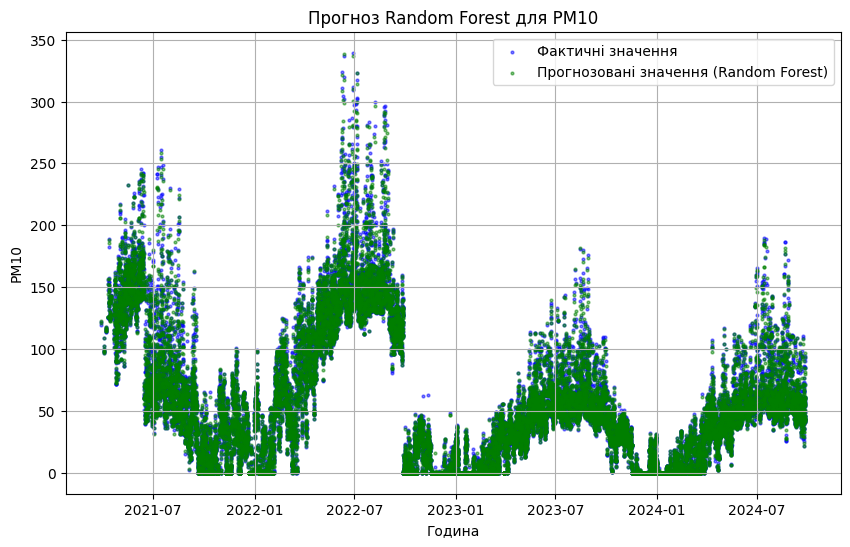

In [26]:
X = data_cleaned[['logged_at']] 
y = data_cleaned['no2_ug']  # NO2 концентрація
# Розділяємо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ініціалізуємо рандомний ліс
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозуємо на тестових даних
y_pred = rf_model.predict(X_test)

# Оцінка моделі
r2 = rf_model.score(X_test, y_test)
print(f'R^2 для Random Forest: {r2}')

# Побудова графіка фактичних і передбачених значень
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='blue', s=4, alpha=0.5, label='Фактичні значення')

plt.scatter(X_test, y_pred, color='green', s=4, alpha=0.5, label='Прогнозовані значення (Random Forest)')

# Додаємо назви та легенду
plt.title('Прогноз Random Forest для PM10')
plt.xlabel('Година')
plt.ylabel('PM10')
plt.legend()
plt.grid(True)
plt.show()